<a href="https://colab.research.google.com/github/xvh422/L4-Project/blob/main/Plot%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install eagleSqlTools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import eagleSqlTools as sql
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec

con = sql.connect("vwg533", password = "FZtn087h")

In [31]:
sim_name = 'RefL0100N1504'
sim_size = 100.

Query_IDs = "SELECT \
              SH.GalaxyID as id \
            FROM \
              %s_SubHalo as SH, \
              %s_Aperture as AP \
            WHERE \
              SH.SnapNum = 28 and \
              SH.SubGroupNumber = 0 and \
              AP.Mass_Star > 1.0e9 and \
              SH.MassType_BH > 1.0e9 and \
              (AP.SFR/AP.Mass_Star) < 5.0e-12 and \
              AP.ApertureSize = 30 and \
              SH.GalaxyID = AP.GalaxyID"%(sim_name, sim_name)

Data_IDs = sql.execute_query(con, Query_IDs)

In [32]:
print(len(Data_IDs['id']))

42


In [33]:
sim_name = 'RefL0100N1504'
sim_size = 100.
galaxy_ids = Data_IDs['id'] #21730535
zs = []
halos = []
bhs = []
sfrs = []

for i in range(len(galaxy_ids)):
  Query = "SELECT \
              gal.Redshift as z, \
              gal.MassType_DM as halo, \
              gal.MassType_BH as bh, \
              gal.StarFormationRate as sfr \
            FROM \
              %s_Subhalo as gal, \
              %s_Subhalo as ref \
            WHERE \
              ref.GalaxyID=%s and \
              ((gal.SnapNum > ref.SnapNum and ref.GalaxyID \
              between gal.GalaxyID and gal.TopLeafID) or \
              (gal.SnapNum <= ref.SnapNum and gal.GalaxyID \
              between ref.GalaxyID and ref.TopLeafID)) \
            ORDER BY \
              gal.Redshift"%(sim_name, sim_name, galaxy_ids[i])

  Data = sql.execute_query(con, Query)
  zs.append(Data['z'])
  halos.append(Data['halo'])
  bhs.append(Data['bh'])
  sfrs.append(Data['sfr'])

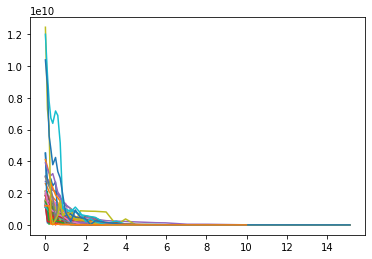

In [34]:
plt.figure()

for i in range(len(bhs)):
  plt.plot(zs[i], bhs[i])

plt.show()

In [35]:
for i in range(len(bhs)):
  print(galaxy_ids[i])
  print(bhs[i][0]/1e10)
  print('')

14793103
0.1319775616

15141076
0.111078016

16001261
0.2098249088

16608246
0.120306304

17697184
0.2728889856

17749095
0.1559482496

17775312
0.1422927232

18680975
0.3076321536

18719249
0.2151824896

18737995
0.1877658624

18758770
0.1554318336

18816264
0.2593699584

18849992
0.1811711616

18873061
0.1216034176

18893253
0.3042075136

18961506
0.1867010304

19020656
0.191451264

19054212
0.1634551424

19076566
0.2079582464

19104572
0.1105098112

19182761
0.4495218176

19250447
0.1446856704

19279479
0.12875296

19291687
0.1162617088

19380932
0.1342731136

19402355
0.1487117952

19862361
0.1165499264

19891777
0.151273536

19927838
0.1516724992

20009128
0.1103452928

20163968
0.4528820224

20574261
0.410836992

20710010
0.1437987328

20823324
0.184771392

20867355
0.3903080704

20915734
0.1984240768

20995479
0.2111116928

21019891
0.2995732736

21573586
1.2437305344

21730535
1.1993590784

21986361
1.0382144512

9915689
0.1202808576

